# Exploratory Data Analysis & Intro

Goal:

1. Investigate higher-paying roles and skills in the data science industry

2. Use Python to explore a real-live dataset on job postings

3. Use these insights to identify the best job opportunities

Questions to Answer:

1. What are the most demanded skills for the top 3 most popular data roles>

2. How are in-demand skills trending for data scientist positions?

3. How well do jobs and certain skills pay for data scientist positions?

4. What are the most optimal skills to learn for data scientist positions (high demand and high paying)?

(focus on data scientist roles within the United States)

In [ ]:
# import libraries
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
# filter for data scientist jobs in the US
df_ds_us = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')]

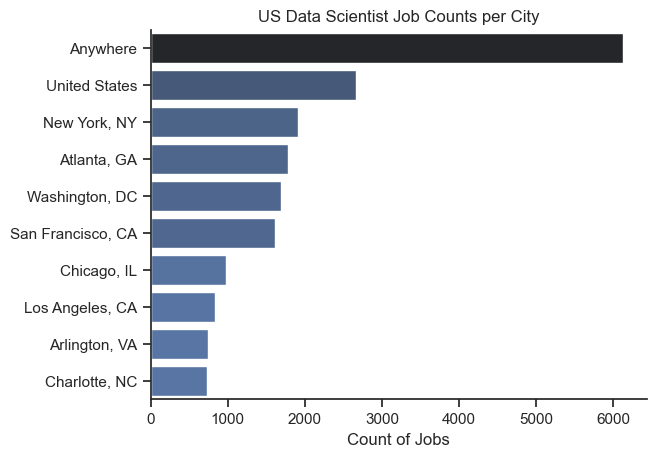

In [17]:
# look at the top 10 most common locations for these jobs and turn it to a dataframe
df_plot = df_ds_us['job_location'].value_counts().head(10).to_frame()

# plot this new dataframe in a bar chart using seaborn
sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_location', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title('US Data Scientist Job Counts per City')
plt.xlabel('Count of Jobs')
plt.ylabel('')
plt.show()

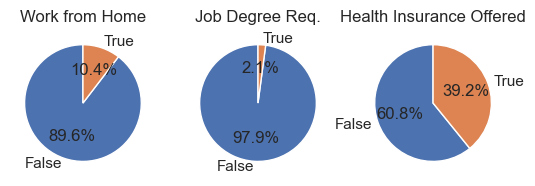

In [16]:
# create pie charts showing remote work options, degree requirements, and health insurance options for these US data scientist roles
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_ds_us[column].value_counts(), startangle = 90, autopct = '%1.1f%%', labels = ['False', 'True'])
    ax[i].set_title(title)

plt.show()

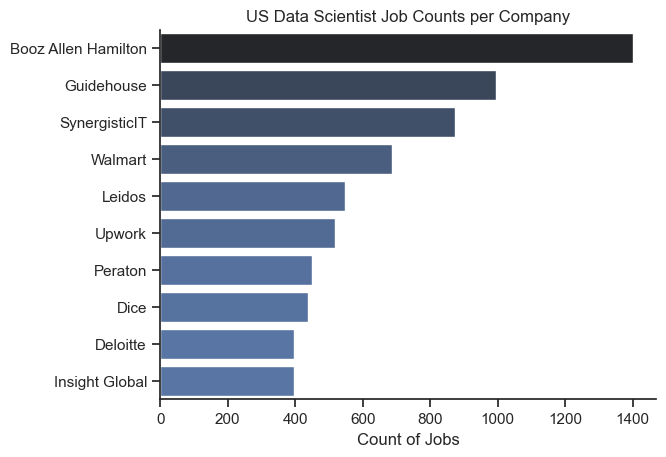

In [19]:
# create a bar chart for the counts of these US data scientist roles by company
df_plot = df_ds_us['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'company_name', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title('US Data Scientist Job Counts per Company')
plt.xlabel('Count of Jobs')
plt.ylabel('')
plt.show()